In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import matplotlib        as mpl
import seaborn           as sns

from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_theme()

mpl.rcParams["figure.figsize"] = (18, 8)
mpl.rcParams["font.size"]      = 22

In [3]:
uri = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"

In [4]:
passageiros = pd.read_csv(uri)

passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


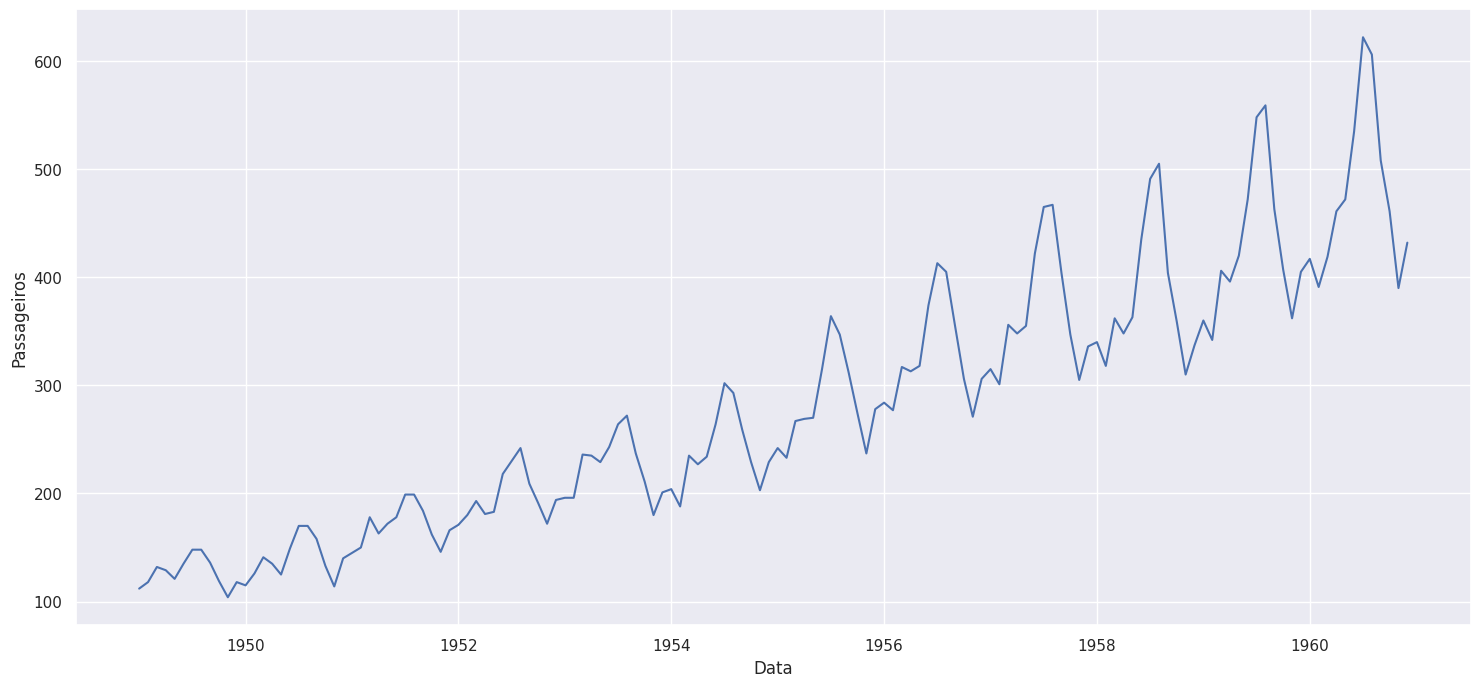

In [5]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [6]:
sc = StandardScaler()

In [7]:
sc.fit(passageiros)

StandardScaler()

In [8]:
dados_escalados = sc.transform(passageiros)

dados_escalados[:5]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

In [9]:
x = dados_escalados[:, 0]
y = dados_escalados[:, 1]

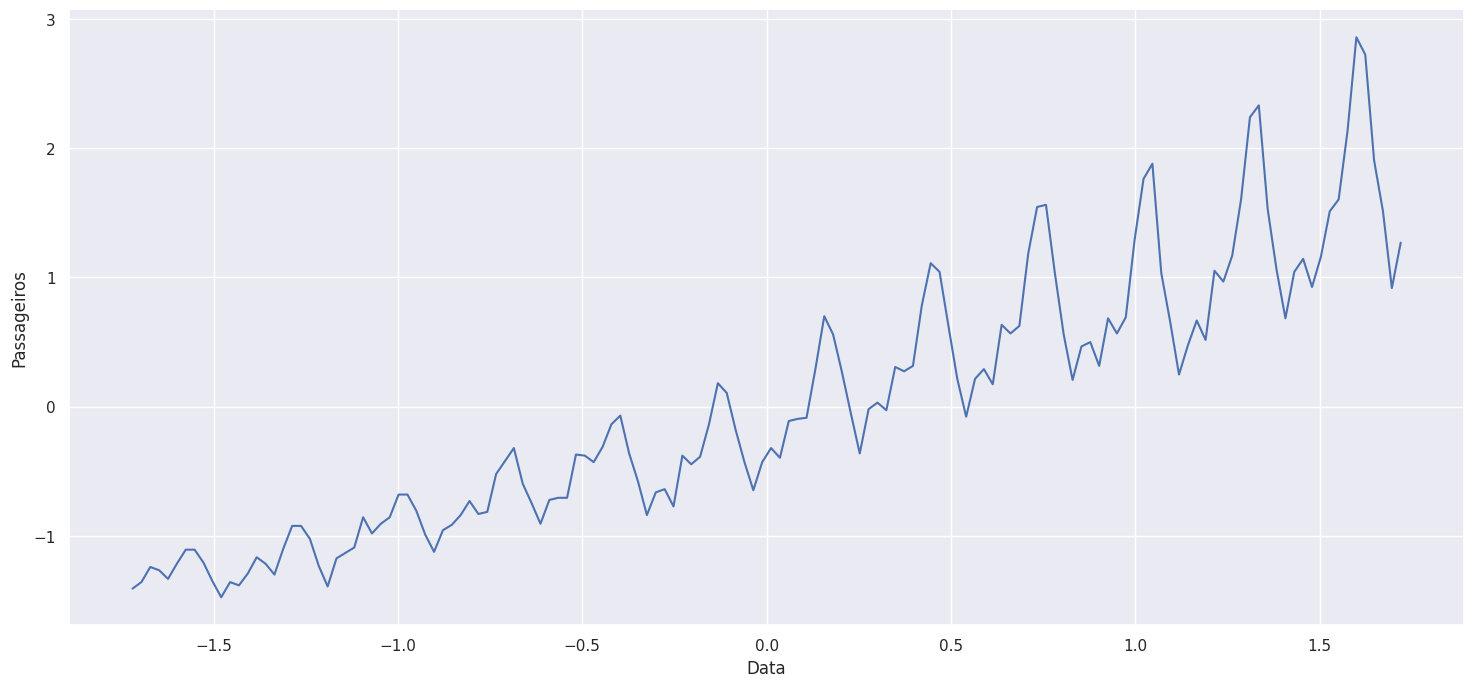

In [10]:
sns.lineplot(x=x, y=y)

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [11]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste  = int(len(passageiros) * 0.1)

In [12]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_teste  = x[-(tamanho_teste + 1):]
y_teste  = y[-(tamanho_teste + 1):]

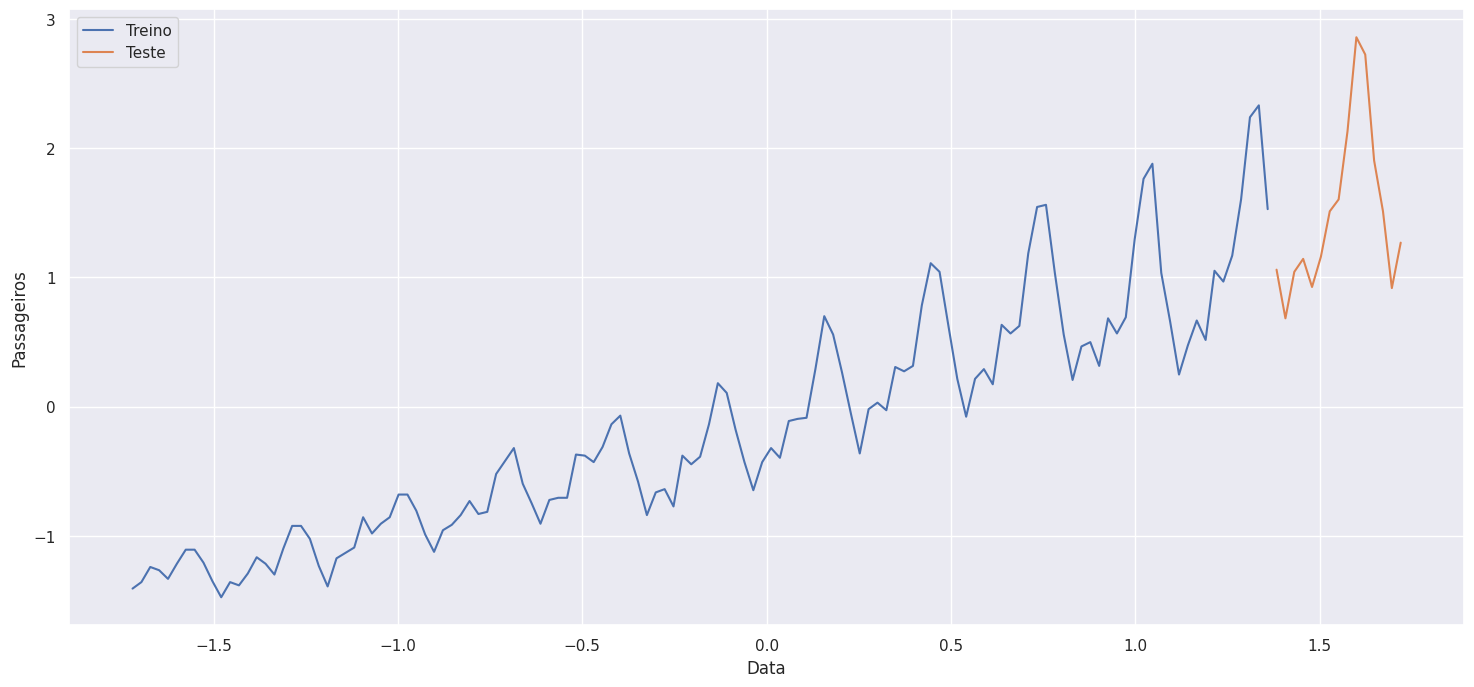

In [13]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-10-08 15:54:08.292242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 15:54:09.406529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 15:54:09.406742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 15:54:09.781252: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-08 15:54:29.576695: W tensorflow/stream_executor/platform/de

In [15]:
regressor = Sequential()

regressor.add(
  Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=True, activation='linear')
)

regressor.compile(loss='mean_squared_error', optimizer='adam')

2022-10-08 15:55:03.357713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-08 15:55:03.357846: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 15:55:03.357969: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matheus-Lenovo-B320-14IKB): /proc/driver/nvidia/version does not exist
2022-10-08 15:55:03.359609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 4s 18ms/step - loss: 0.1285


In [18]:
y_pred = regressor.predict(x_treino)

5/5 [==============================] - 1s 10ms/step


In [19]:
y_pred.shape

(129, 1)

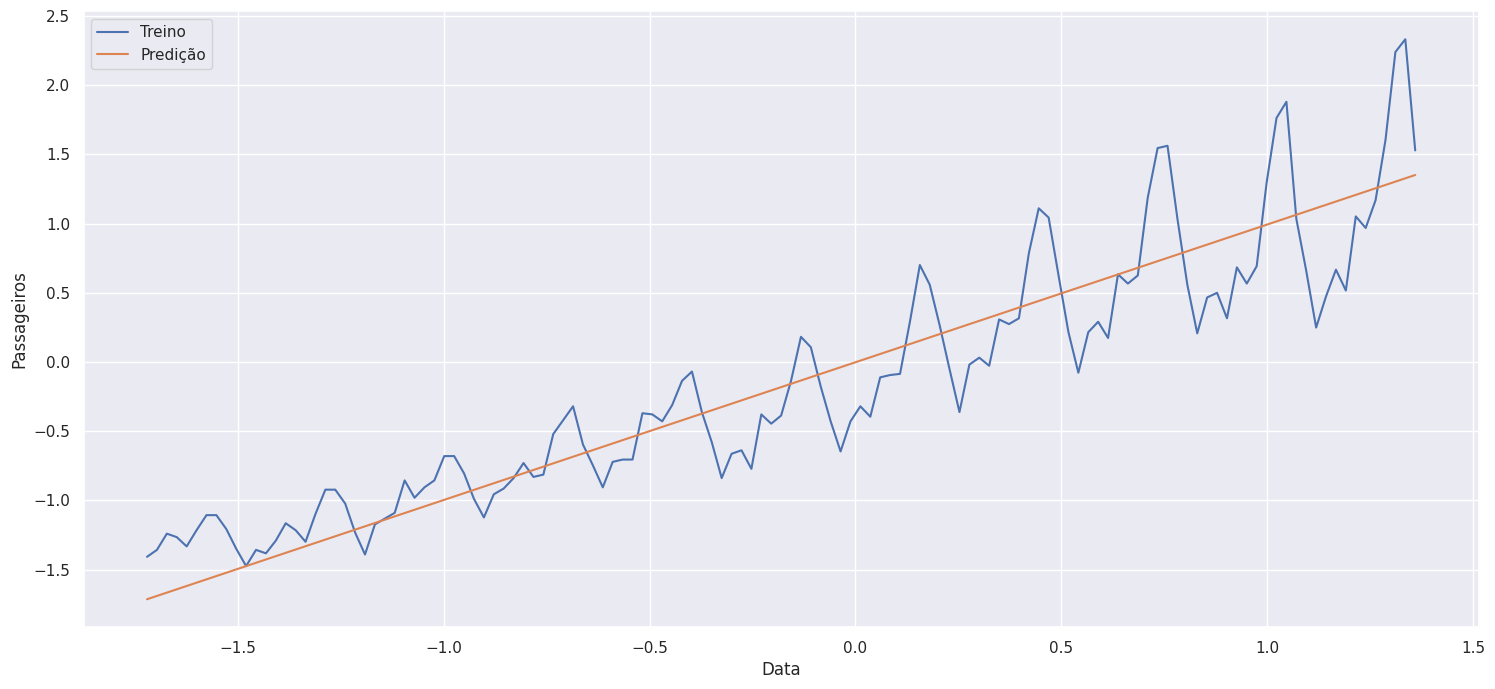

In [20]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_pred[:, 0], label="Predição")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [21]:
regressor = Sequential()

regressor.add(
  Dense(1, input_dim=1, kernel_initializer='ones', use_bias=False, activation='linear')
)

regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [22]:
regressor.fit(x_treino, y_treino)

y_pred = regressor.predict(x_treino)

5/5 [==============================] - 0s 9ms/step


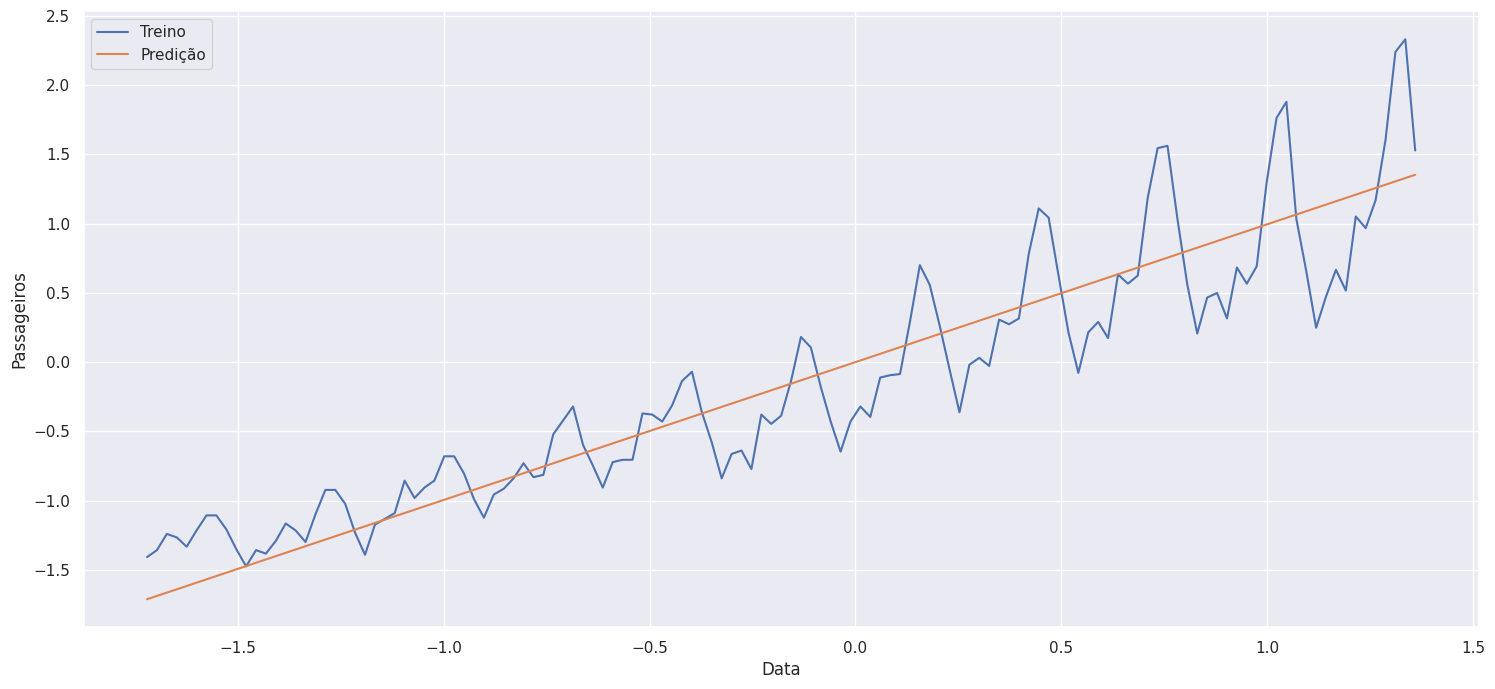

In [23]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_pred[:, 0], label="Predição")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [24]:
d = {
  'tempo': x_treino, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

,tempo,passageiros
0,-1.720064,-1.712133
1,-1.696007,-1.688187
2,-1.671950,-1.664241
3,-1.647894,-1.640295
4,-1.623837,-1.616349


In [25]:
resultados_transf = sc.inverse_transform(resultados)

In [26]:
resultados_transf = pd.DataFrame(resultados_transf).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf.head()

,tempo,passageiros
0,1949.000000,75.614760
1,1949.083333,78.477473
2,1949.166667,81.340186
3,1949.250000,84.202898
4,1949.333333,87.065611


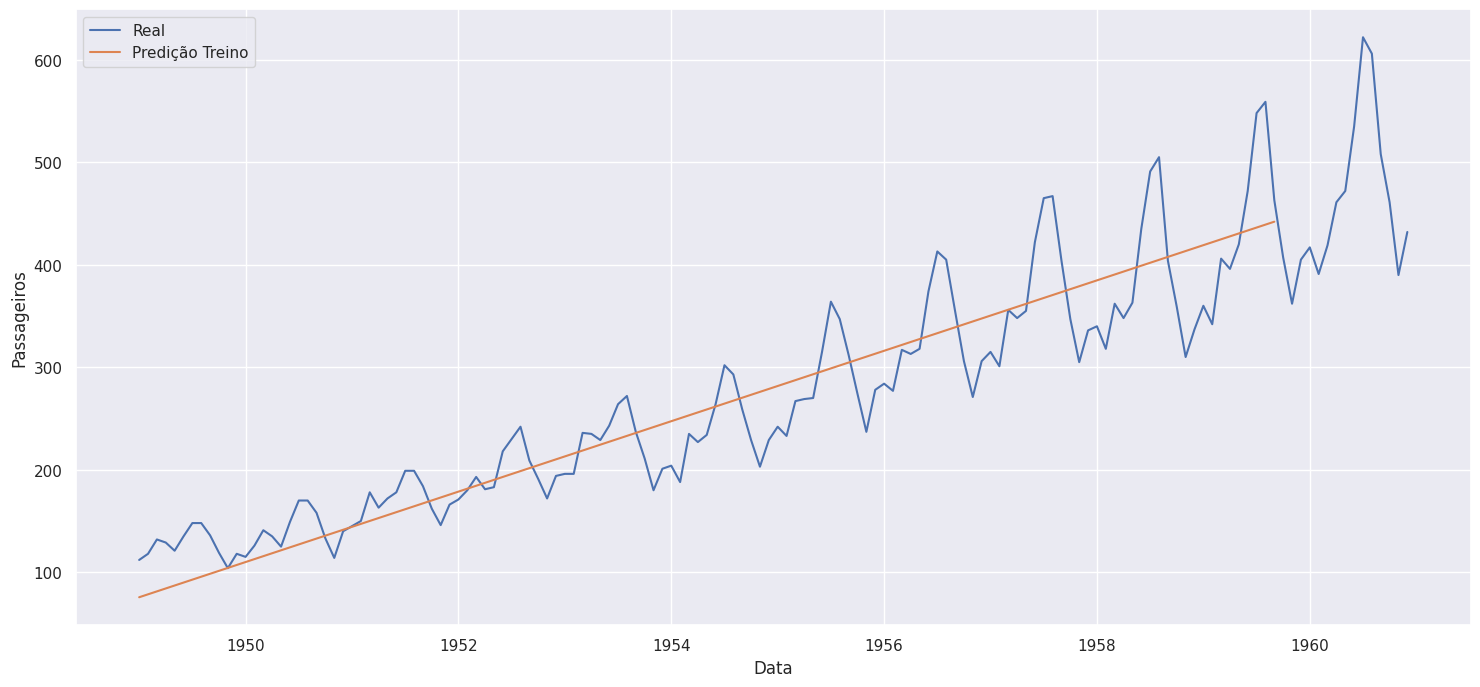

In [27]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", label="Real")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", label="Predição Treino")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [28]:
y_pred = regressor.predict(x_teste)

d = {
  'tempo': x_teste, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

1/1 [==============================] - 0s 88ms/step


,tempo,passageiros
0,1.383268,1.376890
1,1.407325,1.400836
2,1.431382,1.424782
3,1.455439,1.448728
4,1.479496,1.472674


In [29]:
resultados_transf_teste = sc.inverse_transform(resultados)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf_teste.head()

,tempo,passageiros
0,1959.750000,444.904498
1,1959.833333,447.767225
2,1959.916667,450.629924
3,1960.000000,453.492637
4,1960.083333,456.355349


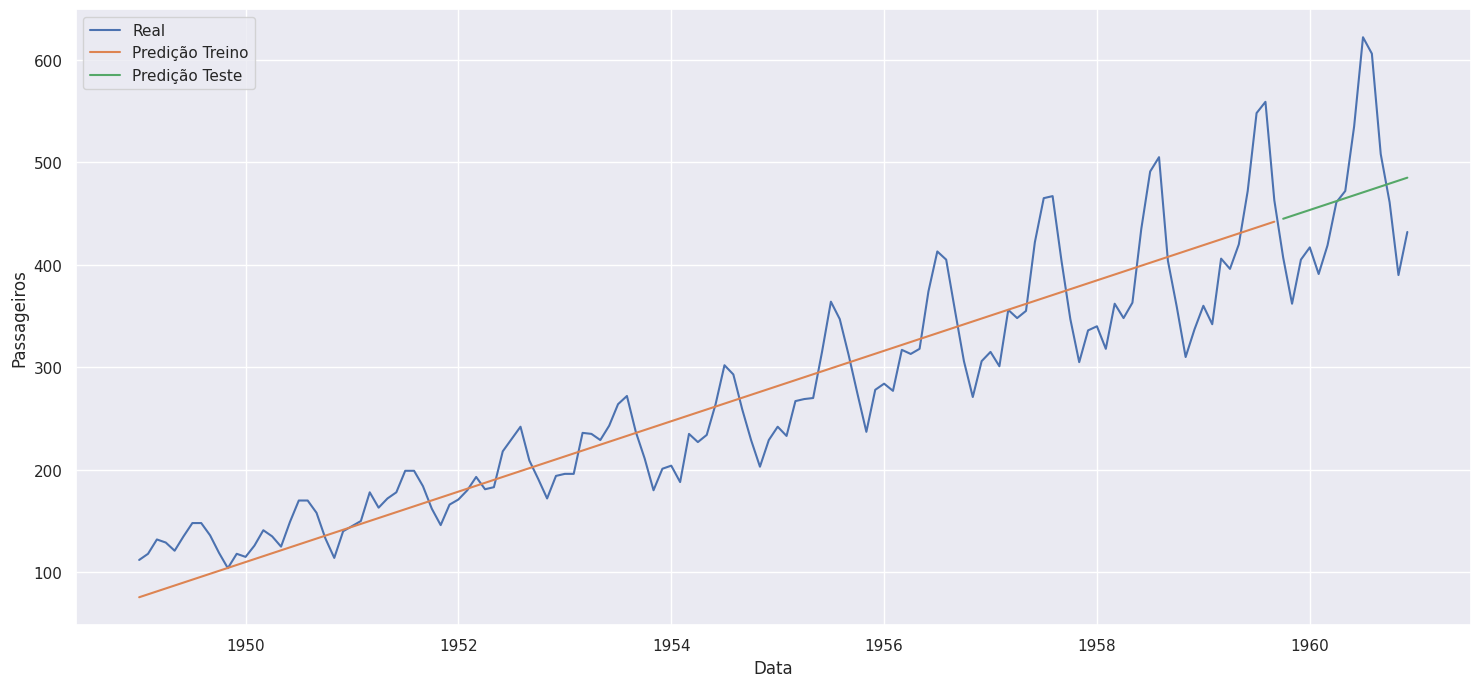

In [30]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", label="Real")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", label="Predição Treino")
sns.lineplot(data=resultados_transf_teste, x="tempo", y="passageiros", label="Predição Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

# MLP

In [31]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))
regressor2.add(Dense(8, kernel_initializer='random_uniform', use_bias=False, activation='linear'))
regressor2.add(Dense(1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 8         
                                                                 
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [32]:
regressor2.fit(x_treino, y_treino, epochs=200)

y_pred = regressor2.predict(x_treino)

d = {
  'tempo': x_treino, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

Epoch 1/200
5/5 [==============================] - 2s 6ms/step - loss: 0.8099
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8095
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8090
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8083
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.8072
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.8057
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 0.8034
Epoch 8/200
5/5 [==============================] - 0s 16ms/step - loss: 0.8006
Epoch 9/200
5/5 [==============================] - 0s 16ms/step - loss: 0.7966
Epoch 10/200
5/5 [==============================] - 0s 17ms/step - loss: 0.7913
Epoch 11/200
5/5 [==============================] - 0s 16ms/step - loss: 0.7850
Epoch 12/200
5/5 [==============================] - 0s 20ms/step - loss: 0.7762
Epoch 13/200
5/5 [==============================] - 0s

,tempo,passageiros
0,-1.720064,-1.572270
1,-1.696007,-1.550281
2,-1.671950,-1.528291
3,-1.647894,-1.506301
4,-1.623837,-1.484311


In [33]:
resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf.head()

,tempo,passageiros
0,1949.000000,92.335207
1,1949.083333,94.964055
2,1949.166667,97.592931
3,1949.250000,100.221779
4,1949.333333,102.850656


In [34]:
y_pred = regressor2.predict(x_teste)

d = {
  'tempo': x_teste, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

1/1 [==============================] - 0s 87ms/step


,tempo,passageiros
0,1.383268,1.264413
1,1.407325,1.286403
2,1.431382,1.308393
3,1.455439,1.330382
4,1.479496,1.352372


In [35]:
resultados_transf_teste = sc.inverse_transform(resultados)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf_teste.head()

,tempo,passageiros
0,1959.750000,431.457988
1,1959.833333,434.086850
2,1959.916667,436.715698
3,1960.000000,439.344560
4,1960.083333,441.973436


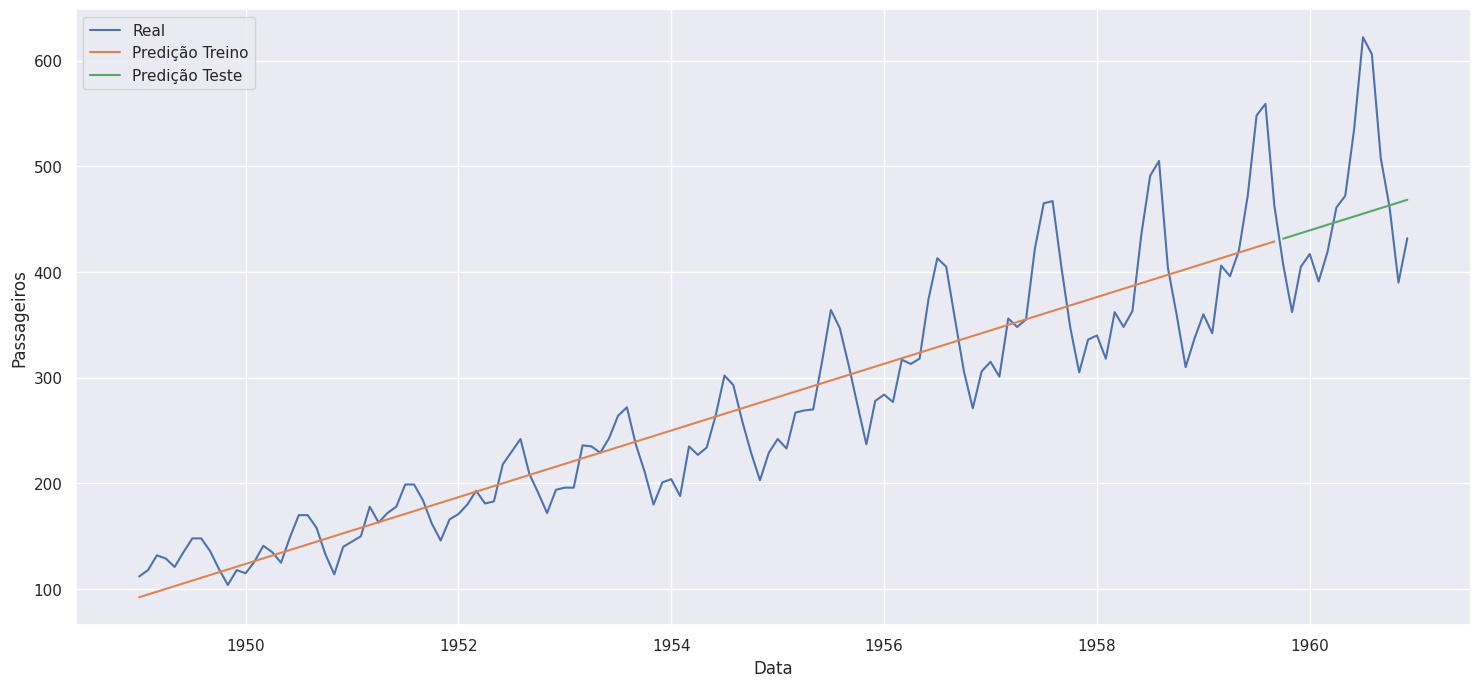

In [36]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", label="Real")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", label="Predição Treino")
sns.lineplot(data=resultados_transf_teste, x="tempo", y="passageiros", label="Predição Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [37]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor3.add(Dense(8, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor3.add(Dense(1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 8         
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [38]:
regressor3.fit(x_treino, y_treino, epochs=500)

y_pred = regressor3.predict(x_treino)

d = {
  'tempo': x_treino, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

Epoch 1/500
5/5 [==============================] - 2s 13ms/step - loss: 0.8213
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 0.8152
Epoch 3/500
5/5 [==============================] - 0s 26ms/step - loss: 0.8117
Epoch 4/500
5/5 [==============================] - 0s 20ms/step - loss: 0.8100
Epoch 5/500
5/5 [==============================] - 0s 19ms/step - loss: 0.8064
Epoch 6/500
5/5 [==============================] - 0s 14ms/step - loss: 0.8025
Epoch 7/500
5/5 [==============================] - 0s 12ms/step - loss: 0.8001
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7980
Epoch 9/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7951
Epoch 10/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7924
Epoch 11/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7903
Epoch 12/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7891
Epoch 13/500
5/5 [==============================] 

,tempo,passageiros
0,-1.720064,-0.811749
1,-1.696007,-0.811427
2,-1.671950,-0.811082
3,-1.647894,-0.810715
4,-1.623837,-0.810323


In [39]:
resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf.head()

,tempo,passageiros
0,1949.000000,183.254798
1,1949.083333,183.293334
2,1949.166667,183.334478
3,1949.250000,183.378400
4,1949.333333,183.425280


In [40]:
y_pred = regressor3.predict(x_teste)

d = {
  'tempo': x_teste, 
  'passageiros': y_pred[:, 0]
}

resultados = pd.DataFrame(d)

resultados.head()

1/1 [==============================] - 0s 162ms/step


,tempo,passageiros
0,1.383268,0.841804
1,1.407325,0.845948
2,1.431382,0.849844
3,1.455439,0.853505
4,1.479496,0.856945


In [41]:
resultados_transf_teste = sc.inverse_transform(resultados)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste).rename(columns={0: 'tempo', 1: 'passageiros'})

resultados_transf_teste.head()

,tempo,passageiros
0,1959.750000,380.935476
1,1959.833333,381.430896
2,1959.916667,381.896594
3,1960.000000,382.334275
4,1960.083333,382.745541


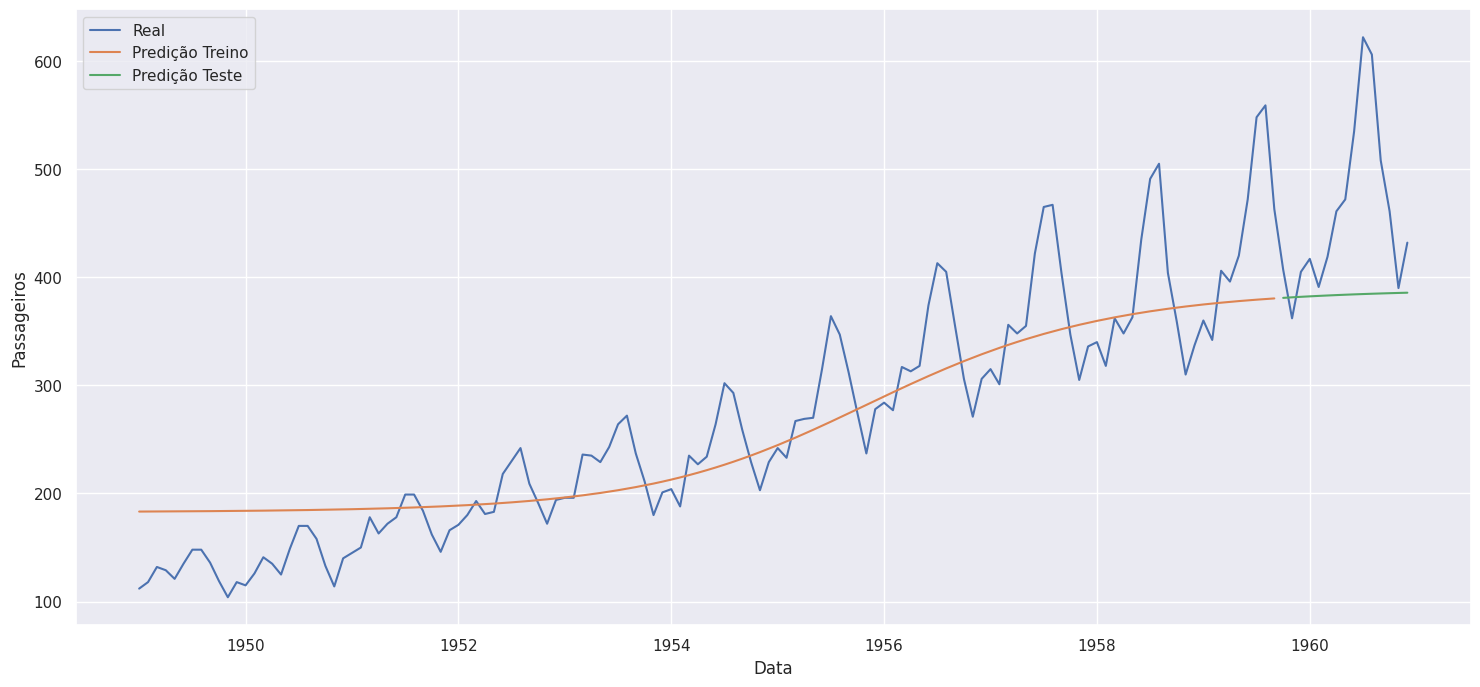

In [42]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", label="Real")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", label="Predição Treino")
sns.lineplot(data=resultados_transf_teste, x="tempo", y="passageiros", label="Predição Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

# Separando dados

In [43]:
vetor = pd.DataFrame(y_treino)[0]

In [44]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos: i - 1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)

  return X_novo, y_novo

In [45]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [46]:
x_treino_novo[:5], y_treino_novo[:5]

(array([[-1.40777884],
        [-1.35759023],
        [-1.24048348],
        [-1.26557778],
        [-1.33249593]]),
 array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918]))

In [47]:
vetor2 = pd.DataFrame(y_teste)[0]

In [48]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [49]:
x_teste_novo[:5], y_teste_novo[:5]

(array([[1.05982773],
        [0.68341317],
        [1.04309819],
        [1.14347541],
        [0.92599144]]),
 array([0.68341317, 1.04309819, 1.14347541, 0.92599144, 1.16020494]))

In [50]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim=1, kernel_initializer='ones', use_bias=False, activation='linear'))
regressor4.add(Dense(64, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor4.add(Dense(1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
4/4 [==============================] - 2s 14ms/step - loss: 0.7736
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 0.7500
Epoch 3/500
4/4 [==============================] - 0s 22ms/step - loss: 0.7325
Epoch 4/500
4/4 [==============================] - 0s 16ms/step - loss: 0.7076
Epoch 5/500
4/4 [==============================] - 0s 21ms/step - loss: 0.6835
Epoch 6/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6612
Epoch 7/500
4/4 [==============================] - 0s 34ms/step - loss: 0.6325
Epoch 8/500
4/4 [==============================] - 0s 37ms/step - loss: 0.6046
Epoch 9/500
4/4 [==============================] - 0s 38ms/step - loss: 0.5745
Epoch 10/500
4/4 [==============================] - 0s 41ms/step - loss: 0.5385
Epoch 11/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5012
Epoch 12/500
4/4 [==============================] - 0s 25ms/step - loss: 0.4637
Epoch 13/500
4/4 [==============================]

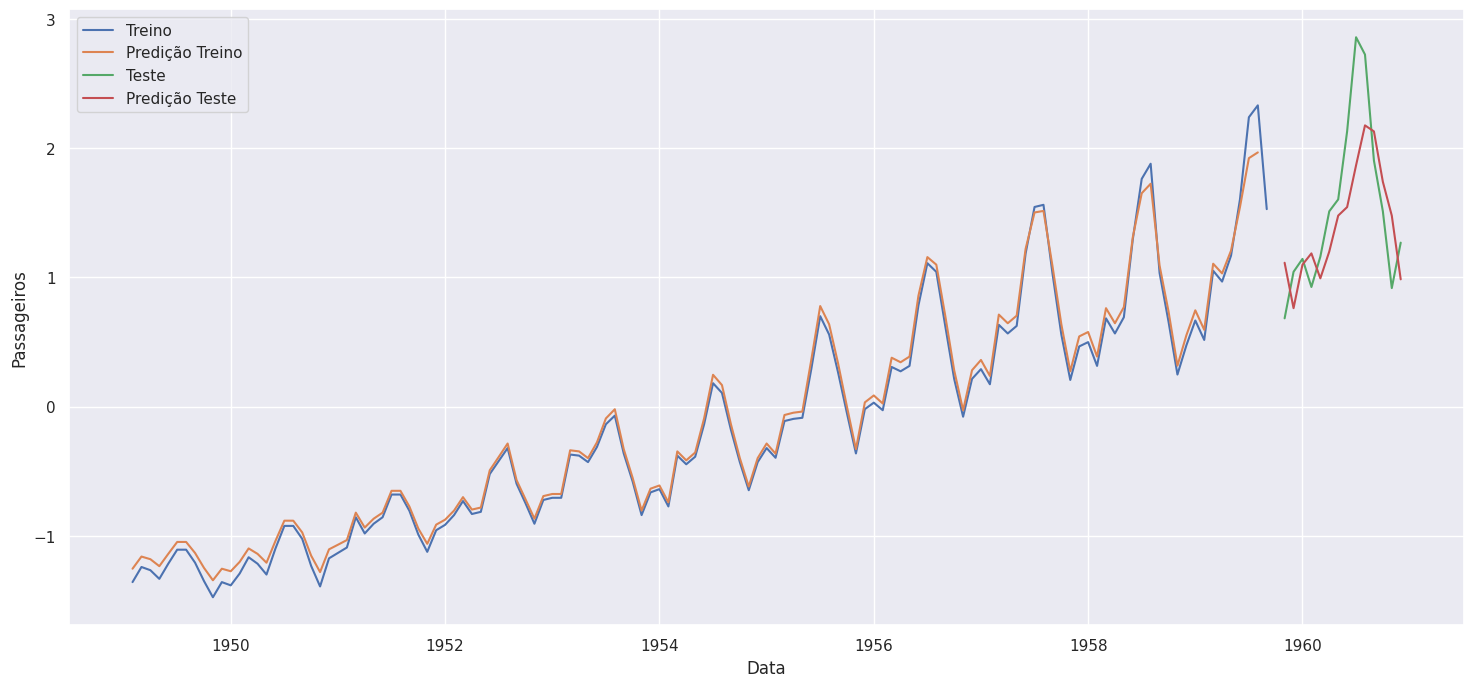

In [51]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=500)

y_pred = regressor4.predict(x_treino_novo)

sns.lineplot(data=passageiros[1:129], x="tempo", y=y_treino_novo, label="Treino")
sns.lineplot(data=passageiros[1:129], x="tempo", y=pd.DataFrame(y_pred)[0], label="Predição Treino")

y_pred = regressor4.predict(x_teste_novo)

sns.lineplot(data=passageiros[130:144], x="tempo", y=y_teste_novo, label="Teste")
sns.lineplot(data=passageiros[130:144], x="tempo", y=pd.DataFrame(y_pred)[0].values, label="Predição Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

In [52]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

x_treino_novo[:10], y_treino_novo[:10]

(array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
        [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
        [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
        [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
        [-1.33249593, -1.21538918, -1.10664719, -1.10664719],
        [-1.21538918, -1.10664719, -1.10664719, -1.20702441],
        [-1.10664719, -1.10664719, -1.20702441, -1.34922546],
        [-1.10664719, -1.20702441, -1.34922546, -1.47469699],
        [-1.20702441, -1.34922546, -1.47469699, -1.35759023],
        [-1.34922546, -1.47469699, -1.35759023, -1.38268454]]),
 array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441,
        -1.34922546, -1.47469699, -1.35759023, -1.38268454, -1.29067209]))

In [53]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

x_teste_novo[:10], y_teste_novo[:10]

(array([[1.05982773, 0.68341317, 1.04309819, 1.14347541],
        [0.68341317, 1.04309819, 1.14347541, 0.92599144],
        [1.04309819, 1.14347541, 0.92599144, 1.16020494],
        [1.14347541, 0.92599144, 1.16020494, 1.5115252 ],
        [0.92599144, 1.16020494, 1.5115252 , 1.60353765],
        [1.16020494, 1.5115252 , 1.60353765, 2.13051803],
        [1.5115252 , 1.60353765, 2.13051803, 2.85825285],
        [1.60353765, 2.13051803, 2.85825285, 2.72441656],
        [2.13051803, 2.85825285, 2.72441656, 1.9046693 ],
        [2.85825285, 2.72441656, 1.9046693 , 1.5115252 ]]),
 array([0.92599144, 1.16020494, 1.5115252 , 1.60353765, 2.13051803,
        2.85825285, 2.72441656, 1.9046693 , 1.5115252 , 0.91762667]))

In [54]:
regressor5 = Sequential()

regressor5.add(Dense(8, input_dim=4, kernel_initializer='ones', use_bias=False, activation='linear'))
regressor5.add(Dense(64, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor5.add(Dense(1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor5.compile(loss='mean_squared_error', optimizer='adam')

regressor5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 32        
                                                                 
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dense_13 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
4/4 [==============================] - 3s 28ms/step - loss: 0.7335
Epoch 2/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6596
Epoch 3/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5869
Epoch 4/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5210
Epoch 5/500
4/4 [==============================] - 0s 22ms/step - loss: 0.4578
Epoch 6/500
4/4 [==============================] - 0s 25ms/step - loss: 0.3987
Epoch 7/500
4/4 [==============================] - 0s 27ms/step - loss: 0.3396
Epoch 8/500
4/4 [==============================] - 0s 17ms/step - loss: 0.2909
Epoch 9/500
4/4 [==============================] - 0s 25ms/step - loss: 0.2423
Epoch 10/500
4/4 [==============================] - 0s 20ms/step - loss: 0.2097
Epoch 11/500
4/4 [==============================] - 0s 23ms/step - loss: 0.1825
Epoch 12/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1625
Epoch 13/500
4/4 [==============================]

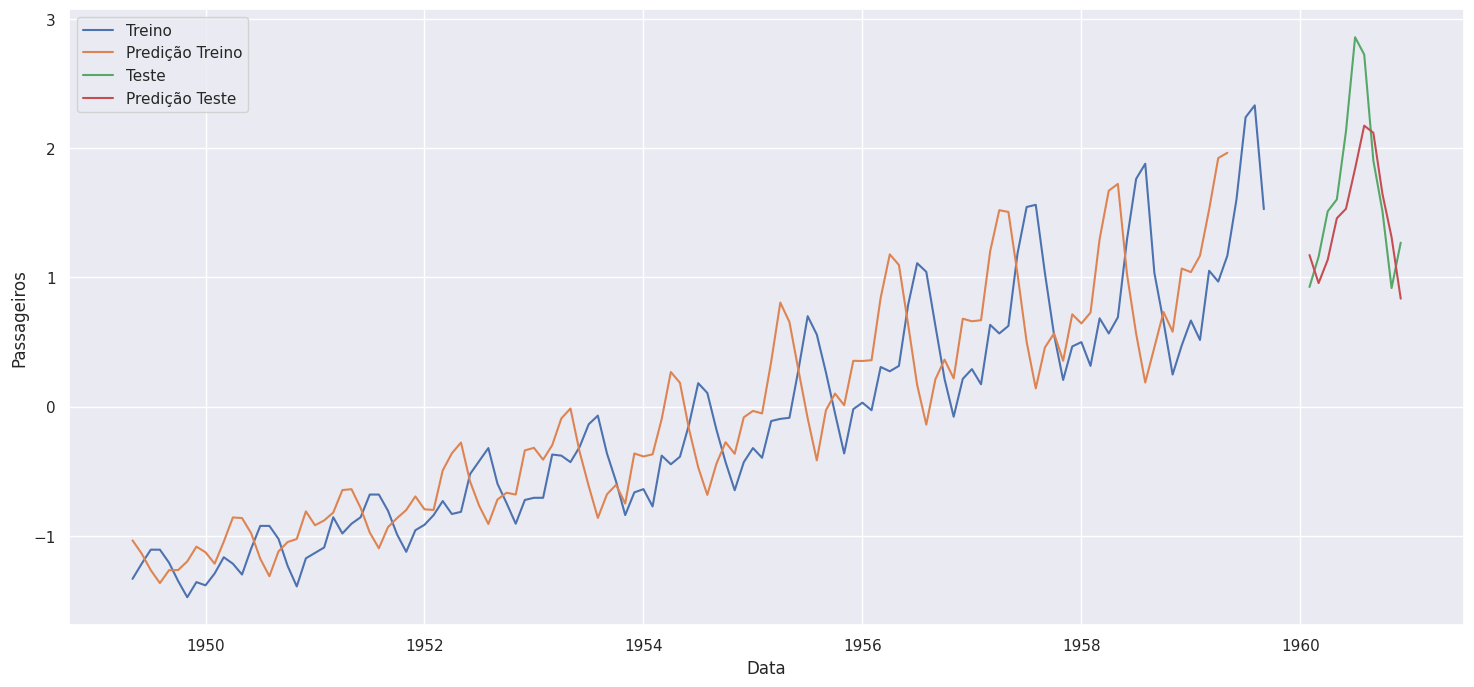

In [55]:
regressor5.fit(x_treino_novo, y_treino_novo, epochs=500)

y_pred = regressor5.predict(x_treino_novo)

sns.lineplot(data=passageiros[4:129], x="tempo", y=y_treino_novo, label="Treino")
sns.lineplot(data=passageiros[4:129], x="tempo", y=pd.DataFrame(y_pred)[0], label="Predição Treino")

y_pred = regressor5.predict(x_teste_novo)

sns.lineplot(data=passageiros[133:144], x="tempo", y=y_teste_novo, label="Teste")
sns.lineplot(data=passageiros[133:144], x="tempo", y=pd.DataFrame(y_pred)[0].values, label="Predição Teste")

plt.xlabel("Data")
plt.ylabel("Passageiros")

plt.show()

# Bicicletas

In [56]:
uri = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv"

In [57]:
bicicletas = pd.read_csv(uri)

bicicletas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [58]:
bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])

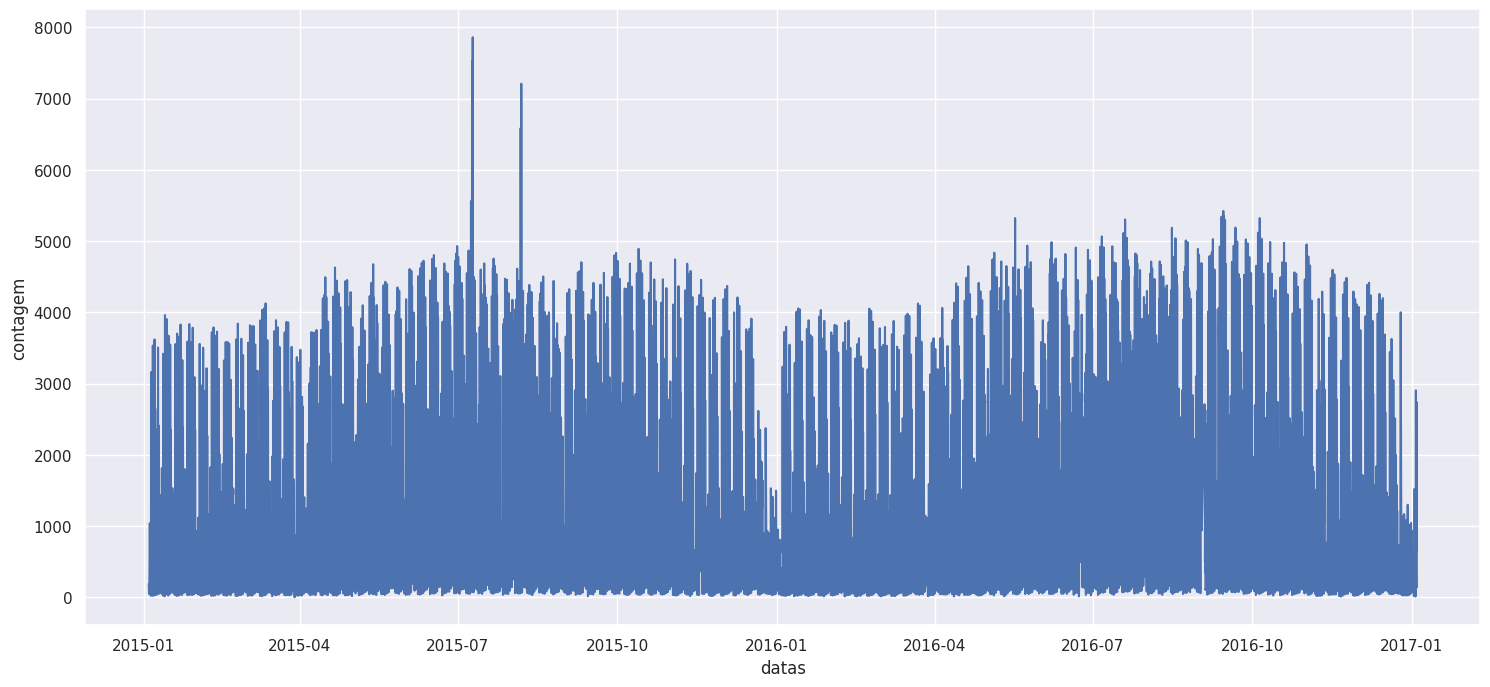

In [59]:
sns.lineplot(data=bicicletas, x='datas', y='contagem')

plt.show()

In [60]:
sc = StandardScaler()

In [61]:
y = sc.fit_transform(bicicletas['contagem'].values.reshape(-1, 1))

In [62]:
tamanho_treino = int(len(bicicletas) * 0.9)
tamanho_teste  = int(len(bicicletas) * 0.1)

In [63]:
y_treino = y[:tamanho_treino]
y_teste  = y[-(tamanho_teste + 1):]

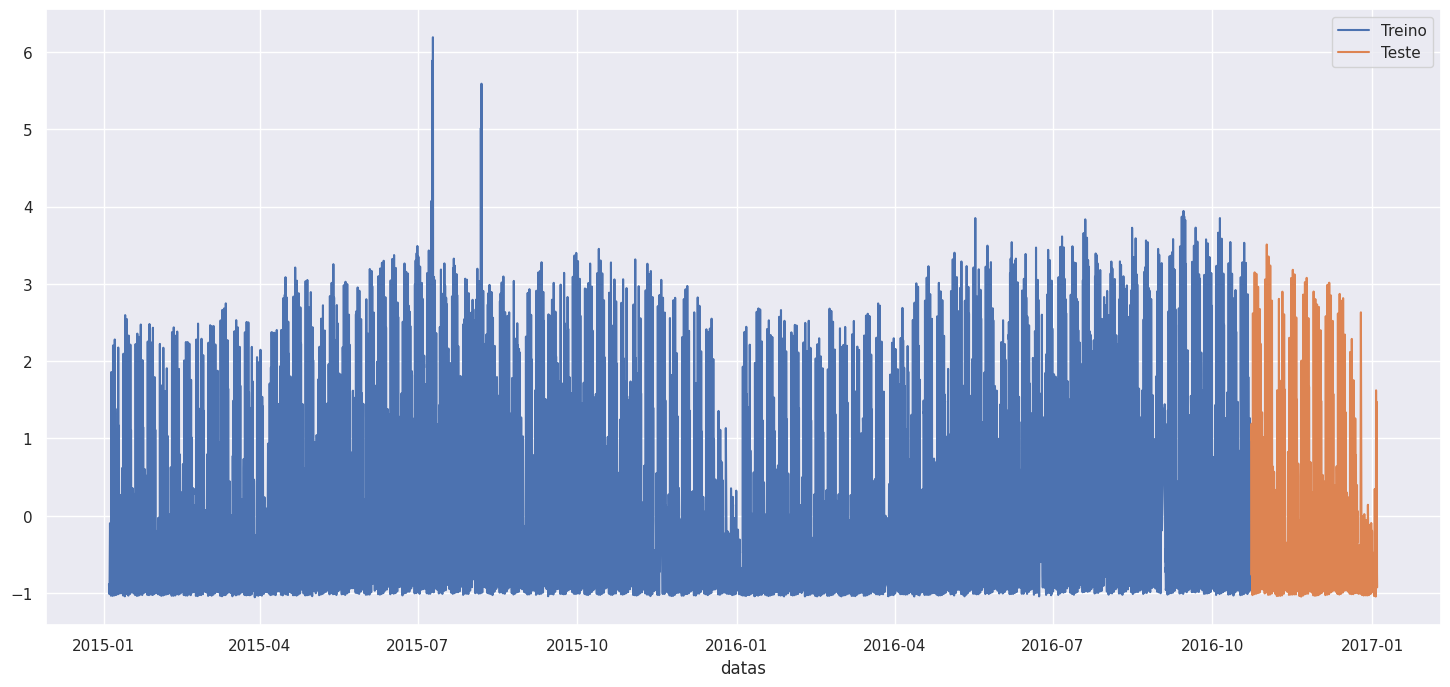

In [64]:
sns.lineplot(data=bicicletas[:tamanho_treino], x='datas', y=y_treino[:, 0], label="Treino")
sns.lineplot(data=bicicletas[-(tamanho_teste + 1):], x='datas', y=y_teste[:, 0], label="Teste")

plt.show()

In [65]:
vetor = pd.DataFrame(y_treino)[0]

In [66]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [67]:
vetor2 = pd.DataFrame(y_teste)[0]

In [68]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [69]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))
x_teste_novo  = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [70]:
recorrente = Sequential()

In [71]:
from tensorflow.keras.layers import LSTM

In [72]:
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [73]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


problema de inicialização dos pesos = Vanishing Gradient
- Solução: glorot_uniform (padrão no keras)

- RMSProp: solução para gradiente explodindo

In [75]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=20)

Epoch 1/20
490/490 [==============================] - 18s 27ms/step - loss: 0.2608 - val_loss: 0.0737
Epoch 2/20
490/490 [==============================] - 12s 24ms/step - loss: 0.0794 - val_loss: 0.0757
Epoch 3/20
490/490 [==============================] - 10s 20ms/step - loss: 0.0570 - val_loss: 0.0325
Epoch 4/20
490/490 [==============================] - 10s 20ms/step - loss: 0.0471 - val_loss: 0.0299
Epoch 5/20
490/490 [==============================] - 10s 20ms/step - loss: 0.0415 - val_loss: 0.0289
Epoch 6/20
490/490 [==============================] - 10s 19ms/step - loss: 0.0387 - val_loss: 0.0259
Epoch 7/20
490/490 [==============================] - 9s 19ms/step - loss: 0.0366 - val_loss: 0.0226
Epoch 8/20
490/490 [==============================] - 10s 20ms/step - loss: 0.0351 - val_loss: 0.0242
Epoch 9/20
490/490 [==============================] - 11s 22ms/step - loss: 0.0338 - val_loss: 0.0227
Epoch 10/20
490/490 [==============================] - 12s 24ms/step - loss: 0.0330

In [79]:
y_ajustado = recorrente.predict(x_treino_novo)

490/490 [==============================] - 6s 10ms/step


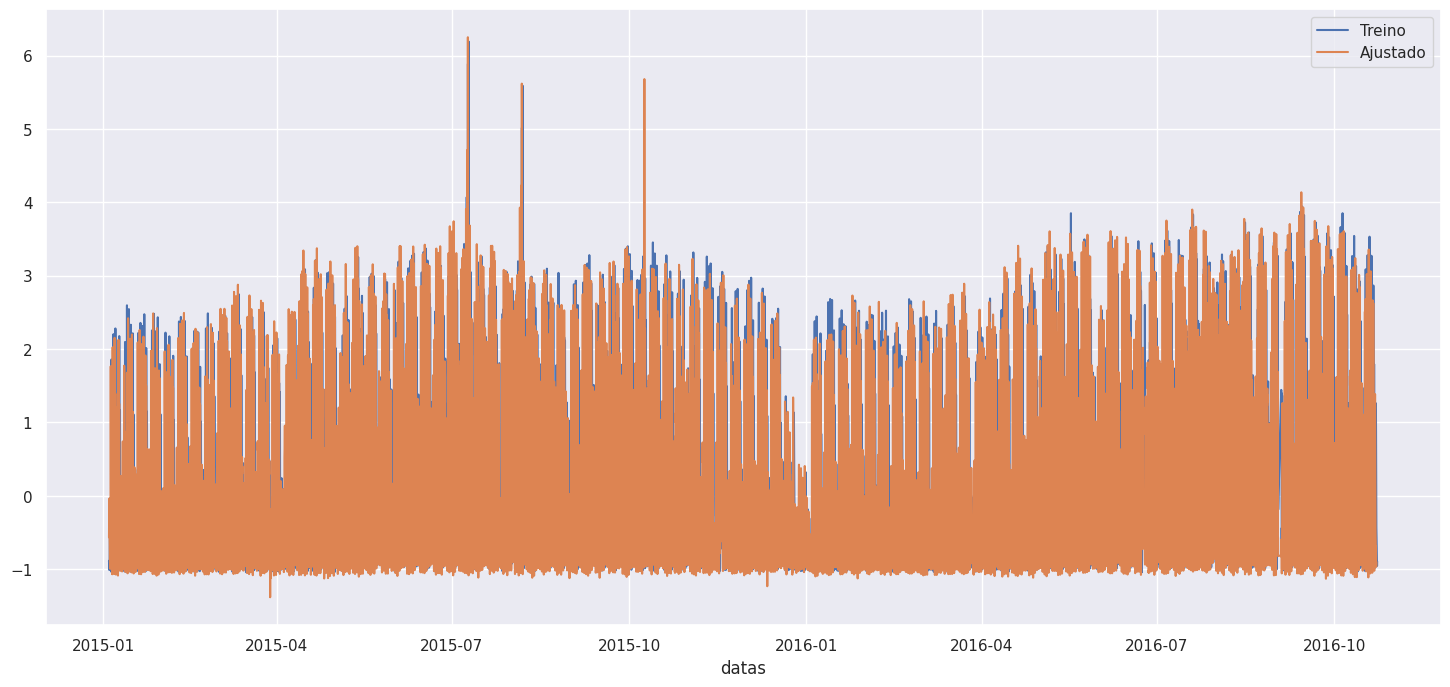

In [81]:
sns.lineplot(data=bicicletas[:tamanho_treino], x='datas', y=y_treino[:, 0], label="Treino")
sns.lineplot(data=bicicletas[:15662], x='datas', y=y_ajustado[:, 0], label="Treino ajustado")

plt.show()

In [82]:
y_pred = recorrente.predict(x_teste_novo)

55/55 [==============================] - 1s 13ms/step


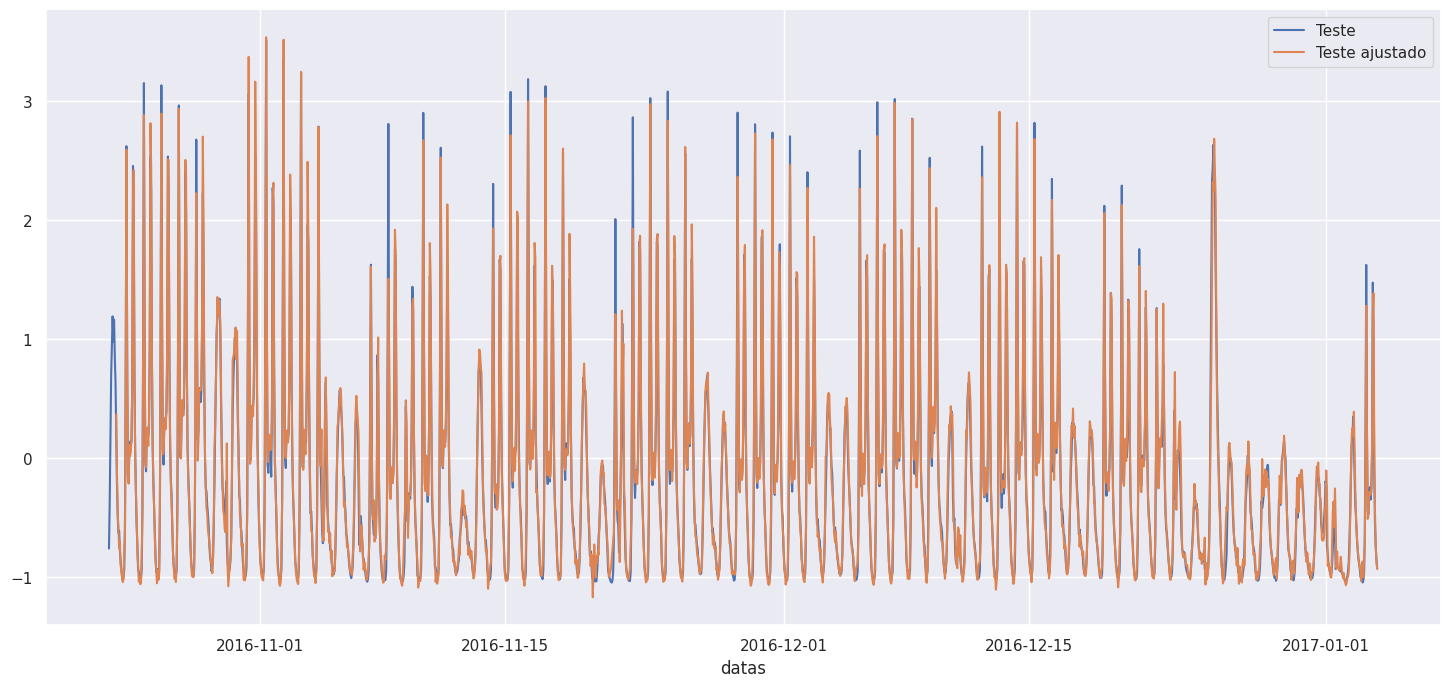

In [86]:
sns.lineplot(data=bicicletas[-(tamanho_teste + 1):], x='datas', y=y_teste[:, 0], label="Teste")
sns.lineplot(data=bicicletas[-1732:], x='datas', y=y_pred[:, 0], label="Teste ajustado")

plt.show()

## GRU
- Treino mais rápido
- Menos parâmetros
- "Lembram" de sequências menores

In [87]:
from tensorflow.keras.layers import GRU

In [88]:
recorrente = Sequential()

recorrente.add(GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [91]:
resultado2 = recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=20)

Epoch 1/20
490/490 [==============================] - 8s 17ms/step - loss: 0.0354 - val_loss: 0.0196
Epoch 2/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0339 - val_loss: 0.0201
Epoch 3/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0328 - val_loss: 0.0191
Epoch 4/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0314 - val_loss: 0.0233
Epoch 5/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0312 - val_loss: 0.0202
Epoch 6/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0300 - val_loss: 0.0217
Epoch 7/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0297 - val_loss: 0.0173
Epoch 8/20
490/490 [==============================] - 8s 16ms/step - loss: 0.0293 - val_loss: 0.0226
Epoch 9/20
490/490 [==============================] - 8s 15ms/step - loss: 0.0287 - val_loss: 0.0185
Epoch 10/20
490/490 [==============================] - 8s 15ms/step - loss: 0.0281 - val_lo

In [92]:
y_pred2 = recorrente.predict(x_teste_novo)

55/55 [==============================] - 1s 7ms/step


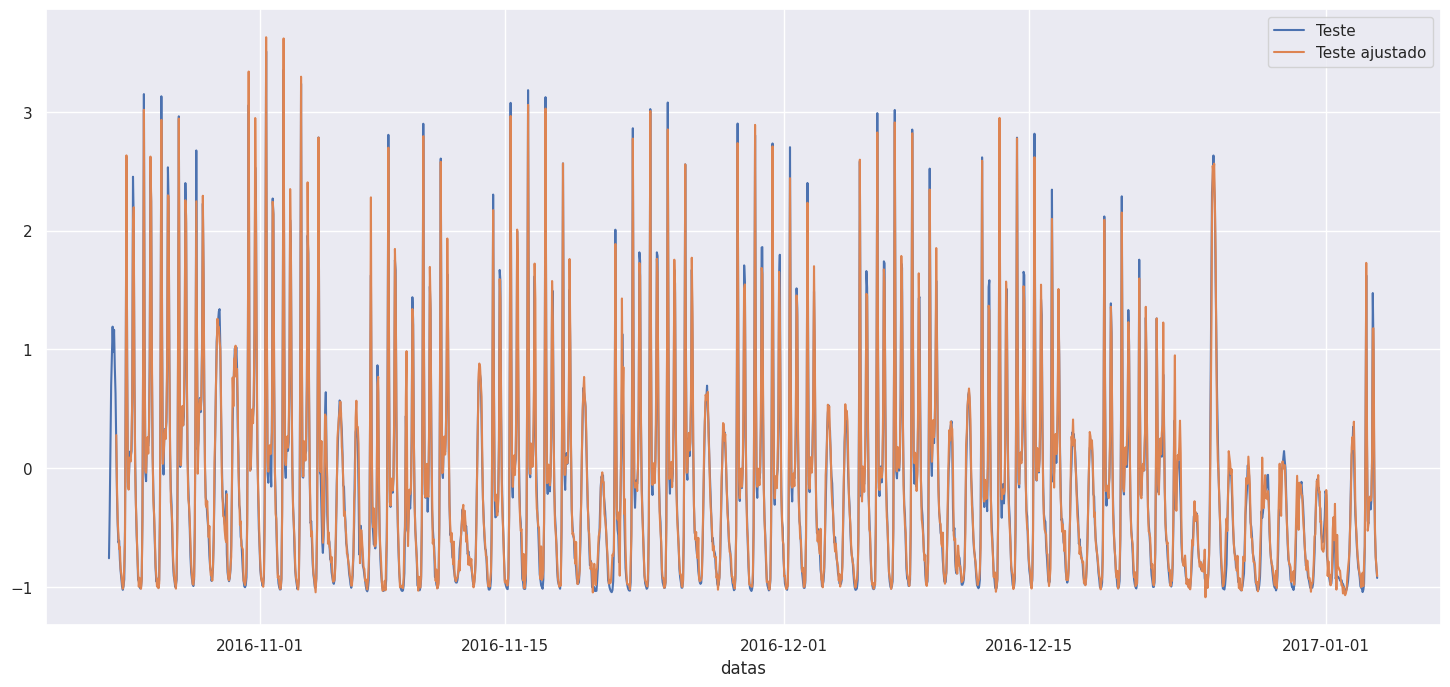

In [98]:
sns.lineplot(data=bicicletas[-(tamanho_teste + 1):], x='datas', y=y_teste[:, 0], label="Teste")
sns.lineplot(data=bicicletas[-1732:], x='datas', y=y_pred2[:, 0], label="Teste ajustado")

plt.show()

# Comparação

In [100]:
resultado

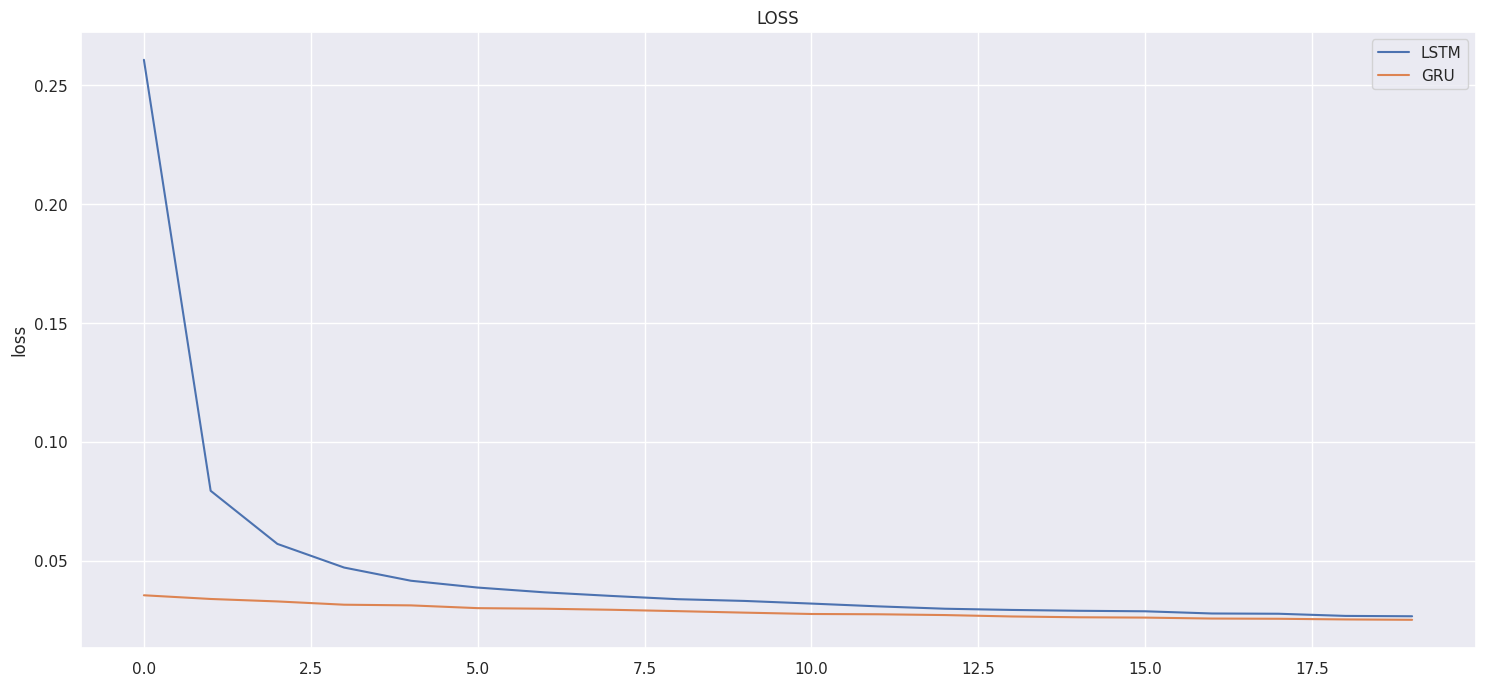

In [106]:
sns.lineplot(data=resultado.history, y='loss', x=list(range(20)), label='LSTM')
sns.lineplot(data=resultado2.history, y='loss', x=list(range(20)), label='GRU')

plt.title("LOSS")

plt.show()

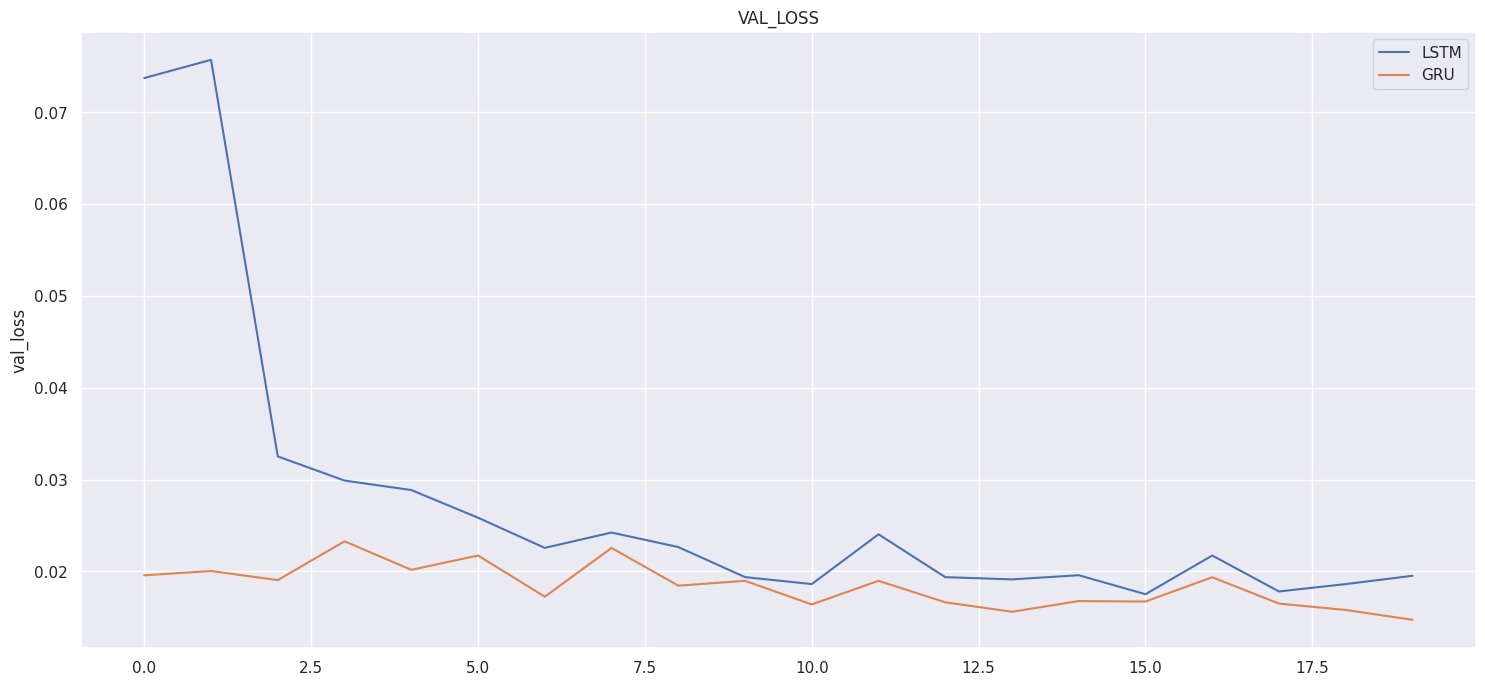

In [105]:
sns.lineplot(data=resultado.history, y='val_loss', x=list(range(20)), label='LSTM')
sns.lineplot(data=resultado2.history, y='val_loss', x=list(range(20)), label='GRU')

plt.title("VAL_LOSS")

plt.show()